<a href="https://colab.research.google.com/github/Shreyash-0699/Pytorch-learning/blob/main/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Convert MNIST image files to Tensor of 4-dimensions (# of images, height, width, color channels)
transform = transforms.ToTensor()

In [3]:
# Train Data
train_data = datasets.MNIST(root = '/cnn_data', train = True, download = True, transform = transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 211534937.62it/s]

Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 106539748.31it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 188300244.95it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18750520.44it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
# Test Data
test_data = datasets.MNIST('/cnn_data', train = False, download = True, transform = transform)

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
cd ../

/


In [7]:
pwd

'/'

In [8]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/   libx32@                   opt/         run/   tmp/
boot/      datalab/                    lib@    media/                    proc/        sbin@  tools/
cnn_data/  dev/                        lib32@  mnt/                      python-apt/  srv/   usr/
content/   etc/                        lib64@  NGC-DL-CONTAINER-LICENSE  root/        sys/   var/


In [9]:
cd cnn_data

/cnn_data


In [10]:
# Create a small batch size for images... let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [11]:
# Define our CNN Model

# Describe Convolutional Layer and what it's doing (2 convolutional layers)
# This is just an example, in the next video we'll build out the actual model
conv1 = nn.Conv2d(1, 6, 3, 1)
# Args: 1st --> # image, 2nd --> output features, 3rd --> kernel size, 4th --> stride
conv2 = nn.Conv2d(6, 16, 3, 1)

In [12]:
# Grab 1 MNIST record/image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [13]:


X_train.shape

# 1 image
# size = 28 * 28 pixel

torch.Size([1, 28, 28])

In [14]:

x = X_train.view(1,1,28,28)
# 1 batch of 1 image of size 28*28 pixels

In [15]:
# Perform our first convolution
x = F.relu(conv1(x))  # Rectified Linear Unit for our activation function

In [16]:
x.shape

# 1 single image, 6 --> filters we asked for
# image size --> 26*26 --> image size shrinks because padding wasn't defined inherently

torch.Size([1, 6, 26, 26])

In [17]:




# pass thru the pooling layer
x = F.max_pool2d(x,2,2)  # kernel of 2 and stride of 2

In [18]:
x.shape

# 1 image, 6 --> filters we asked for
# 13*13, pooling done with a kernel of 2*2 and stride of 2 at a time

torch.Size([1, 6, 13, 13])

In [19]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [20]:
x.shape   # Again, we didn't set padding so we lose 3 pixels around the outside of the image

torch.Size([1, 16, 11, 11])

In [21]:
# Pooling layer
x = F.max_pool2d(x,2,2)

In [22]:
x.shape # 11/2 = 5/5, but we have to round down, round down since we are losing data through pooling

torch.Size([1, 16, 5, 5])

In [23]:
# Model Class

class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    # Fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2*2 kernel and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    # Re-View to flatten it out
    X = X.view(-1, 16*5*5)  # -1 so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [24]:
# Create an Instance of our Model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
# Create an Instance of our Model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Smaller the learning rate, longer its training time

In [26]:

import time
start_time = time.time()

# Create variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop of Epochs
for i in range(epochs):
  train_corr = 0
  test_corr = 0

  # Train
  for batch, (X_train, y_train) in enumerate(train_loader):
    batch += 1 # Start our batches  at 1
    y_pred = model(X_train)  # get predicted values from the training set. Not flattened
    loss = criterion(y_pred, y_train)  # how off are we? Compare the predictions to the correct answers

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False = 0
    train_corr += batch_corr # keep track as we go along in the training

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if batch%600 == 0:
      print(f"Epoch: {i} Batch: {batch} Loss: {loss.item()}")

  train_losses.append(loss)
  train_correct.append(train_corr)

  # Test
  with torch.no_grad(): # No gradient so we don't update our weights and biases with test
    for batch, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]  # Adding up correct predictions
      test_corr += (predicted == y_test).sum()  # T=1 F=0 and sum away

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)


current_time = time.time()
total_time = current_time - start_time
print(f"Training Took: {total_time/60} minutes!")

Epoch: 0 Batch: 600 Loss: 0.1599934995174408
Epoch: 0 Batch: 1200 Loss: 0.18979528546333313
Epoch: 0 Batch: 1800 Loss: 0.5580862760543823
Epoch: 0 Batch: 2400 Loss: 0.2070152312517166
Epoch: 0 Batch: 3000 Loss: 0.006888664327561855
Epoch: 0 Batch: 3600 Loss: 0.33112621307373047
Epoch: 0 Batch: 4200 Loss: 0.004664934705942869
Epoch: 0 Batch: 4800 Loss: 0.0020317500457167625
Epoch: 0 Batch: 5400 Loss: 0.06558699160814285
Epoch: 0 Batch: 6000 Loss: 0.000513441045768559
Epoch: 1 Batch: 600 Loss: 0.004773168824613094
Epoch: 1 Batch: 1200 Loss: 0.30684694647789
Epoch: 1 Batch: 1800 Loss: 0.0025840331800282
Epoch: 1 Batch: 2400 Loss: 0.004851708188652992
Epoch: 1 Batch: 3000 Loss: 0.05095291882753372
Epoch: 1 Batch: 3600 Loss: 0.29904529452323914
Epoch: 1 Batch: 4200 Loss: 0.020275484770536423
Epoch: 1 Batch: 4800 Loss: 0.0018002415308728814
Epoch: 1 Batch: 5400 Loss: 0.0003511425748001784
Epoch: 1 Batch: 6000 Loss: 0.16817066073417664
Epoch: 2 Batch: 600 Loss: 0.044435493648052216
Epoch: 2 B

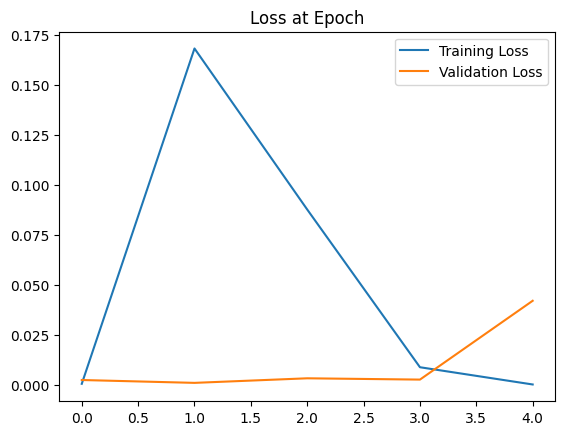

In [27]:
# Graph the loss at epoch

train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label = "Training Loss")
plt.plot(test_losses, label = "Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

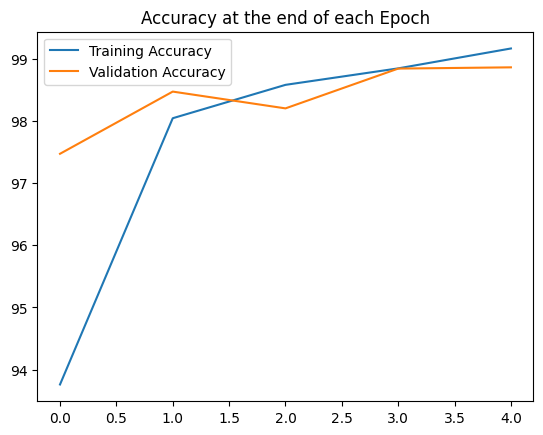

In [28]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [29]:
test_load_everything = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [30]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [31]:
correct.item()/len(test_data) * 100

98.86

In [32]:
# Grab an image
test_data[4143]       # Tensor with an image in it... at end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [33]:
# Grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [34]:
# Reshape
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

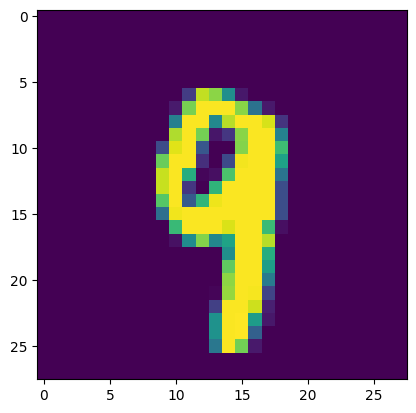

In [35]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [36]:
# Pass the image thru our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28*28 image


In [37]:
# Check the new prediction... get probabilities
new_prediction

tensor([[-2.6323e+01, -2.2043e+01, -2.5815e+01, -1.6283e+01, -1.1452e+01,
         -2.2503e+01, -3.8594e+01, -1.5411e+01, -1.7841e+01, -1.0967e-05]])

In [38]:
new_prediction.argmax()

tensor(9)